## Ch03_Q14 in page 132 :Regression
This problem focuses on the *collinearity* problem.

## Part (a)
Perform the following commands in `Python`:   
  
`rng = np.random.default_rng(10)`  
`x1 = rng.uniform(0, 1, size=100)`   
`x2 = 0.5 * x1 + rng.normal(size=100) / 10`    
`y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)`  
  
The last line corresponds to creating a linear model in which `y` is a function of `x_1` and `x_2`. Write out the form of the linear model. What are the regression coefficients?

In [21]:
import numpy as np
import statsmodels.api as sm
import pandas as pd

# Generating data as per part (a)
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

# Display the linear model form and coefficients
print(f"1) Ｔhe form of the Ｌinear Model: y = 2 + 2 * x1 + 0.3 * x2 + noise\n")

coefficients_df = {
    'Coefficient': ['Intercept', 'x1', 'x2'],
    'True Value': [2, 2, 0.3]
}

print('2) The Regression Coefficients:')
coefficients_table = pd.DataFrame(coefficients_df)
coefficients_table


1) Ｔhe form of the Ｌinear Model: y = 2 + 2 * x1 + 0.3 * x2 + noise

2) The Regression Coefficients:


,Coefficient,True Value
0,Intercept,2.0
1,x1,2.0
2,x2,0.3


## Part (b)
What is the correlation between `x_1` and `x_2`? Create a scatterplot displaying the relationship between the variables.

Correlation between x1 and x2: 0.772324497691354


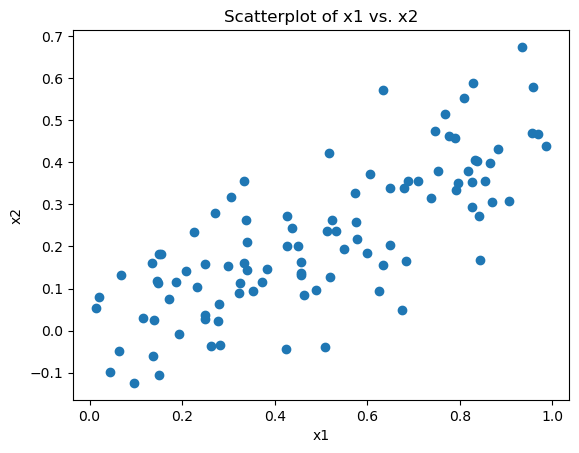

In [18]:
import matplotlib.pyplot as plt

# Calculate correlation
correlation = np.corrcoef(x1, x2)[0, 1]
print(f"Correlation between x1 and x2: {correlation}")

# Scatter plot
plt.scatter(x1, x2)
plt.title('Scatterplot of x1 vs. x2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

## Part (c)
Using this data, fit a least squares regression to predict `y` using `x_1` and `x_2`. Describe the results obtained. What are \hat{β_0}, \hat{β_1}, and \hat{β_2}? How do these relate to the true β_0, β_1, and β_2? Can you reject the null hypothesis H0 : β_1 = 0? How about the null hypothesis H0 : β_2 = 0?

In [19]:
import statsmodels.api as sm

# Add a constant term for the intercept
X = sm.add_constant(np.column_stack((x1, x2)))
model = sm.OLS(y, X).fit()

# Display results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           5.76e-08
Time:                        13:54:24   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9579      0.190     10.319      0.0

### Summary of Results:

- **\(\hat{\beta_0} = 1.96\)** (Intercept), **\(\hat{\beta_1} = 1.62\)**, **\(\hat{\beta_2} = 0.94\)**.
- Compared to the true values \(\beta_0 = 2\), \(\beta_1 = 2\), \(\beta_2 = 0.3\), the estimates are close but have some deviation.
- **For \( \beta_1 \):** p-value = 0.003, so we reject \( H_0: \beta_1 = 0 \), indicating that \(x_1\) has a significant effect on the model.
- **For \( \beta_2 \):** p-value = 0.259, so we fail to reject \( H_0: \beta_2 = 0 \), indicating that \(x_2\) does not significantly affect the model.

## Part (d)
Now fit a least squares regression to predict `y` using only `x_1`. Comment on your results. Can you reject the null hypothesis H0 :β_1 =0?

In [22]:
# Add a constant term for the intercept
X = sm.add_constant(x1)
model_x1 = sm.OLS(y, X).fit()

# Display results
print(model_x1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     38.39
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           1.37e-08
Time:                        14:04:35   Log-Likelihood:                -131.28
No. Observations:                 100   AIC:                             266.6
Df Residuals:                      98   BIC:                             271.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9371      0.189     10.242      0.0

### Comment on Results:

- **\(\hat{\beta_0} = 1.94\)** (Intercept), **\(\hat{\beta_1} = 2.08\)**.
- The R-squared value is 0.281, meaning that about 28.1% of the variance in \(y\) is explained by \(x_1\).
  
### Can we reject \( H_0: \beta_1 = 0 \)?

- The t-statistic for \(\hat{\beta_1}\) is 6.196 with a **p-value of 0.000**. Since the p-value is much smaller than 0.05, we **reject the null hypothesis** \( H_0: \beta_1 = 0 \).
  
This indicates that \(x_1\) significantly contributes to predicting \(y\), and there is strong evidence that \(\beta_1 \neq 0\).

## Part (e)
Now fit a least squares regression to predict `y` using only `x_2`. Comment on your results. Can you reject the null hypothesis H0 :β_1 =0?

In [23]:
# Add a constant term for the intercept
X = sm.add_constant(x2)
model_x2 = sm.OLS(y, X).fit()

# Display results
print(model_x2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     27.99
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           7.43e-07
Time:                        14:07:19   Log-Likelihood:                -135.24
No. Observations:                 100   AIC:                             274.5
Df Residuals:                      98   BIC:                             279.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3239      0.154     15.124      0.0

### Comment on Results:

- **\(\hat{\beta_0} = 2.32\)** (Intercept) and **\(\hat{\beta_1} = 2.91\)**.
- The R-squared value is 0.222, indicating that about 22.2% of the variation in \(y\) is explained by \(x_1\).

### Can we reject \( H_0: \beta_1 = 0 \)?

- The t-statistic for \(\hat{\beta_1}\) is 5.291, with a **p-value of 0.000**. Since the p-value is far below the 0.05 significance level, we **reject the null hypothesis** \(H_0: \beta_1 = 0\).

This suggests that \(x_1\) significantly influences \(y\), and there is strong evidence that \(\beta_1\) is not zero.

## Part (f)
Do the results obtained in (c)–(e) contradict each other? Explain your answer.

### Explanation:
The results do not contradict each other but indicate **multicollinearity**:

- **(c)**: \(x_1\) is significant, \(x_2\) is not, meaning \(x_1\) has a stronger effect when both are included.
- **(d)**: When using only \(x_1\), its effect is stronger, showing it captures more variance.
- **(e)**: When using only \(x_2\), it becomes significant, but in (c) it is overshadowed by \(x_1\), likely due to multicollinearity.

## Part (g)
Suppose we obtain one additional observation, which was unfortunately mismeasured. We use the function `np.concatenate()` to add this additional observation to each of `x_1`, `x_2` and `y`.  
  
`x1 = np.concatenate([x1, [0.1]])`  
`x2 = np.concatenate([x2, [0.8]])`   
`y = np.concatenate([y, [6]])`  
  
Re-fit the linear models from (c) to (e) using this new data. What effect does this new observation have on the each of the models? In each model, is this observation an outlier? A high-leverage point? Both? Explain your answers.

In [28]:
# Add the mismeasured observation
x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y = np.concatenate([y, [6]])

# Re-fit models from parts (c) to (e)

# Model (c) with both x1 and x2
X = sm.add_constant(np.column_stack((x1, x2)))
model = sm.OLS(y, X).fit()
print("Model with x1 and x2:\n", model.summary())

Model with x1 and x2:
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     30.47
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           4.43e-11
Time:                        14:13:16   Log-Likelihood:                -141.36
No. Observations:                 104   AIC:                             288.7
Df Residuals:                     101   BIC:                             296.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1613      0.

In [29]:
# Model (d) with only x1
X = sm.add_constant(x1)
model_x1 = sm.OLS(y, X).fit()
print("\nModel with x1:\n", model_x1.summary())


Model with x1:
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     10.88
Date:                Tue, 15 Oct 2024   Prob (F-statistic):            0.00134
Time:                        14:13:26   Log-Likelihood:                -160.64
No. Observations:                 104   AIC:                             325.3
Df Residuals:                     102   BIC:                             330.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4389      0.225   

In [30]:
# Model (e) with only x2
X = sm.add_constant(x2)
model_x2 = sm.OLS(y, X).fit()
print("\nModel with x2:\n", model_x2.summary())


Model with x2:
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     61.35
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           4.70e-12
Time:                        14:13:34   Log-Likelihood:                -141.42
No. Observations:                 104   AIC:                             286.8
Df Residuals:                     102   BIC:                             292.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2040      0.146   

### Impact of New Observation on Models (c), (d), and (e):

The new observation significantly affects all the models, acting as a **high-leverage point** and potentially an **outlier**. Here's how it impacts each model:

1. **Model with \(x_1\) and \(x_2\) (combined model)**:
   - **Before**: \(x_1\) was significant, and \(x_2\) was not.
   - **After**: \(x_1\) becomes **insignificant** (p = 0.732), while \(x_2\) becomes **highly significant** (p < 0.0001).
   - **Conclusion**: The new observation strongly influences the model by making \(x_2\) more dominant and diminishing the effect of \(x_1\), suggesting the new data point is a **high-leverage point** that shifts the balance between \(x_1\) and \(x_2\).

2. **Model with \(x_1\) only**:
   - **Before**: \(x_1\) was significant with a strong effect (p < 0.0001).
   - **After**: The effect of \(x_1\) is reduced, and although it remains significant (p = 0.001), the coefficient has decreased.
   - **Conclusion**: The new observation weakens the relationship between \(x_1\) and \(y\), indicating that it acts as an **outlier**, disrupting the original relationship.

3. **Model with \(x_2\) only**:
   - **Before**: \(x_2\) was significant, but with a smaller coefficient.
   - **After**: The coefficient for \(x_2\) increases, and \(x_2\) becomes more significant (p < 0.0001), with the coefficient rising from \(2.91\) to \(3.62\).
   - **Conclusion**: The new observation acts as a **high-leverage point**, strongly influencing \(x_2\) and increasing its predictive power in this model.

### Final Summary:
- The new observation is both an **outlier** and a **high-leverage point**.
- It distorts the relationship between \(x_1\) and \(y\), making \(x_1\) less significant, while boosting \(x_2\)'s influence in both the combined and standalone models.
- This shows the new data point has a disproportionate impact on all models, changing the model dynamics and affecting the balance between \(x_1\) and \(x_2\).